# Librerías

In [1]:
'''La libreria pandas proporciona herramientas de analisis y manipulacion de datos de alto rendimiento'''
import pandas
import pydotplus
'''seaborn es una librería de visualización de datos para Python desarrollada sobre matplotlib'''
import seaborn as sns
'''Utilizada para hacer análisis predictivo'''
from sklearn import tree
'''Cadenas de texto son de tipo str y se delimitan mediante el uso de comillas simples o dobles'''
from six import StringIO
'''librería para sacar las metricas de un entrenamiento'''
from sklearn import metrics
'''biblioteca para la generación de gráficos a partir de datos contenidos'''
import matplotlib.pyplot as plt
'''librería que permite guardar una imágen'''
from IPython.display import Image
'''libreria para generar la matriz de confusión'''
from sklearn.metrics import confusion_matrix
'''libreria para generar la matriz de confusión de fora gráfica'''
from sklearn.metrics import plot_confusion_matrix
'''Determinación de las metricas que se obtuvieron en el entrenamiento, la la viable objetivo es multiclase y es por ello que se calculan las tres clases'''
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
'''uso de la libretia metrict de sklearn para sacar en una esquema la exactitud y precisión'''
from sklearn.metrics import accuracy_score, precision_score
'''Líbreria para graficar el arbol de decisión'''
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# Asignación del dataset

In [2]:
'''dando uso de la libreria pandas se puede cargar el contenido del dataset 'Diabetes.csv'y este es guardado en la variable df'''
df = pandas.read_csv('Diabetes.csv')
'''Usando la funcion 'head()' se puede construir un dataframe de los datos cargados en la variable objeto df '''
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


# Escaneo de los datos que se reemplazarán por números

In [3]:
'''Se agrupan los datos del campo correspondiente al género, ya que estos serán cambiados a número. 
Esto tambien se usa para verificar que no existan anomalías en los datos'''
df.groupby('Gender').size()

Gender
F    434
M    565
f      1
dtype: int64

In [4]:
'''Se agrupan los datos del campo correspondiente a la variable objbetivo, ya que estos serán cambiados a número. 
Esto tambien se usa para verificar que no existan anomalías en los datos'''
df.groupby('CLASS').size()

CLASS
N     102
N       1
P      53
Y     840
Y       4
dtype: int64

### Reemplazo de datos

In [5]:
'''Se realiza una pequeña limpieza, es decir que se reemplazan las minusculas por mayusculas en el campo del género'''
df['Gender']=df['Gender'].replace('f','F')

In [6]:
'''Se realiza una pequeña limpieza, es decir que se reemplazan las minusculas por mayusculas en el campo de la varibale objetivo'''
df['CLASS']=df['CLASS'].replace('Y ','Y')
df['CLASS']=df['CLASS'].replace('N ','N')

### Verificación del reemplazo

In [7]:
'''Se agrupan los datos del campo correspondiente al género, ya que estos serán cambiados a número. 
Esto tambien se usa para verificar que no existan anomalías en los datos'''
df.groupby('Gender').size()

Gender
F    435
M    565
dtype: int64

In [8]:
'''Se agrupan los datos del campo correspondiente a la variable objbetivo, ya que estos serán cambiados a número. 
Esto tambien se usa para verificar que no existan anomalías en los datos'''
df.groupby('CLASS').size()

CLASS
N    103
P     53
Y    844
dtype: int64

# Transformación de datos string a numéricos

In [9]:
'''Transformación de datos string a numéricos, en este caso se aplica al campo correspondiente al género'''
d1 = {'F': 0, 'M': 1}
df['Gender'] = df['Gender'].map(d1)

In [10]:
'''Transformación de datos string a numéricos, en este caso se aplica al campo correspondiente a la variable objetivo'''
d2 = {'N': 0, 'P': 1, 'Y': 2}
df['CLASS'] = df['CLASS'].map(d2)

### Verificación de los cambios aplicados

In [11]:
'''Usando la funcion 'head()' se puede construir un dataframe para observar de mejor forma los datos '''
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,735,34221,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,420,47975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,680,87656,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,504,34223,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0


# Selección de características y variable objetivo

### Cracterísticas

In [12]:
'''Creación de un array en donde se colocan los nombres de los campos seleccionados como características'''
features = ['Gender', 'AGE', 'Urea','Cr','HbA1c', 'Chol', 'TG','HDL','LDL', 'VLDL', 'BMI']
'''Asignación del array al data frame para seleccionar de mejor forma las características'''
X = df[features]
'''Impresión de las caracteristicas usando la funcion head() para visualizar de mejor forma los datos'''
X.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0
2,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
3,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
4,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0


### Variable objetivo

In [13]:
'''Asignacion de toda la columna de 'CLASS' que se encuentra en el dataframe '''
y = df.CLASS
'''Impresión de la variable objetivo usando la funcion head() para visualizar de mejor forma los datos'''
y.head()

0    0
1    0
2    0
3    0
4    0
Name: CLASS, dtype: int64

# División de datos

In [14]:
'''División del modelo con 70% de entrenamiento y 30% prueba'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Modelo de clasificación a implementar

In [15]:
''''Contrucción de un clasificador de árbol de decisión a partir del conjunto de entrenamiento '''
clf = DecisionTreeClassifier()
'''Uso de las caracteristicas y etiquetas para realizar el entrenamiento. 
    En este caso se llama al modelo de clasificación asignado anteriormente
    y para el entrenamiento se usa la funcion que brinda Python que en este caso es "fit" '''
clf = clf.fit(X_train, y_train)
'''Uso de los test de caracteristicas para realizar la predicción. Para su implementación se da uso del entrenamiento
y este llama a la función 'predict' la cual es propia de Python, como parámetro se tiene el test de la variable de objetivo'''
y_pred = clf.predict(X_test)

# Matríz de confusión

#### Matríz sin diseño

In [16]:
'''Creación de la matríz de confusión usando las pruebas de la variable objetivo y la predicción de este'''
matrizConf=(confusion_matrix(y_test, y_pred))
'''Impresión de la matríz'''
print(matrizConf)

[[ 29   0   3]
 [  2  13   1]
 [  4   1 247]]


#### Matríz con diseño

C:\Users\lesly\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
findfont: Font family ['Amasis MT Pro Black'] not found. Falling back to DejaVu Sans.


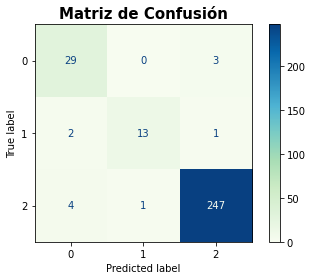

In [17]:
'''Proporcionará una matriz que representa los verdaderos positivos, falsos positivos, falsos negativos y verdaderos negativos de forma gráfica. '''
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.GnBu)
'''Asignación de un título'''
plt.title("Matriz de Confusión",
        #'''Posición de la matríz al ser ejecutada'''
          position=(0.5, 0.9),
         # '''Tipo de letra'''
          fontdict={'family': 'Amasis MT Pro Black',
          #          '''Letra en negritas'''
                    'weight': 'bold',
           #         '''tamaño del título'''
                    'size': 15})
'''Ejecución de la matríz'''
plt.show()

### Métricas

In [18]:
'''Determinación de las metricas que se obtuvieron en el entrenamiento, la la viable objetivo es multiclase y es por ello que se calculan las tres clases'''
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3'])) #'N': 0, 'P': 1, 'Y': 2 Sensibilidad
''' Interpretación: 
Para la clase 1 en la que los pacientes no tienen diabetes se obtuvo una precision del 83%.
Para la clase 2 en la que los pacientes probablemente tienen diabetes se obtuvo una precision del 100%
Para la clase 3 en la que los pacientes si tiene diabetes se obtuvo una precision del 98%%. 
La exactitud del modelo es del 97% en lo que se puede recomendar su implementación
'''

              precision    recall  f1-score   support

     Class 1       0.83      0.91      0.87        32
     Class 2       0.93      0.81      0.87        16
     Class 3       0.98      0.98      0.98       252

    accuracy                           0.96       300
   macro avg       0.91      0.90      0.90       300
weighted avg       0.96      0.96      0.96       300



' Interpretación: \nPara la clase 1 en la que los pacientes no tienen diabetes se obtuvo una precision del 83%.\nPara la clase 2 en la que los pacientes probablemente tienen diabetes se obtuvo una precision del 100%\nPara la clase 3 en la que los pacientes si tiene diabetes se obtuvo una precision del 98%%. \nLa exactitud del modelo es del 97% en lo que se puede recomendar su implementación\n'